In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import math
import seaborn as sns

import to_rgb

In [2]:
df = pd.read_csv('10轮.csv')
len(df)

30000

## lgm

In [3]:
# 定义区间和间隔
start = 7.5
end = 11.5
interval = 0.5

# 创建区间范围
bins = np.arange(start, end + interval, interval)

# 根据10轮预测值的均值 划分样本区间
df['lgm_bin'] = pd.cut(df['lgm_mean'], bins=bins)

In [4]:
# 统计各区间的数量
counts = df['lgm_bin'].value_counts().sort_index()

# 输出结果
print(counts)

(7.5, 8.0]         53
(8.0, 8.5]        303
(8.5, 9.0]        876
(9.0, 9.5]       2505
(9.5, 10.0]      5813
(10.0, 10.5]    11295
(10.5, 11.0]     7017
(11.0, 11.5]     2138
Name: lgm_bin, dtype: int64


In [5]:
# 选择列
columns = ['lgm_1', 'lgm_2', 'lgm_3', 'lgm_4', 'lgm_5', 'lgm_6', 'lgm_7', 'lgm_8', 'lgm_9', 'lgm_10']

# 定义一个函数来计算每个样本的标准差
def row_std(row):
    return row[columns].std()

# 计算每一行样本的标准差
df['row_std'] = df.apply(row_std, axis=1)

# 输出结果
print(df['row_std'])

0        0.079068
1        0.069225
2        0.108964
3        0.049793
4        0.054210
           ...   
29995    0.090279
29996    0.079116
29997    0.054915
29998    0.130543
29999    0.074701
Name: row_std, Length: 30000, dtype: float64


In [6]:
# 按照 'lgm_bin' 划分的区间，计算标准差的均值
mean_std_lgm = df.groupby('lgm_bin')['row_std'].mean()

# 存储mean_std_lgm的值
mean_std_lgm_values = []

for name, mean_dev in mean_std_lgm.iteritems():
    print(f'区间 {name} 的均值为: {mean_dev}')
    mean_std_lgm_values.append(mean_dev)

# 包含了每个区间样本的 标准差的均值
mean_std_lgm_values

区间 (7.5, 8.0] 的均值为: 0.08744700738143911
区间 (8.0, 8.5] 的均值为: 0.10818525269714013
区间 (8.5, 9.0] 的均值为: 0.09064539434938346
区间 (9.0, 9.5] 的均值为: 0.06934340486798932
区间 (9.5, 10.0] 的均值为: 0.06429041145089028
区间 (10.0, 10.5] 的均值为: 0.06040049745539488
区间 (10.5, 11.0] 的均值为: 0.06271385598036097
区间 (11.0, 11.5] 的均值为: 0.07269174952026702


E:\Temp\ipykernel_3484\4213207258.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, mean_dev in mean_std_lgm.iteritems():


[0.08744700738143911,
 0.10818525269714013,
 0.09064539434938346,
 0.06934340486798932,
 0.06429041145089028,
 0.06040049745539488,
 0.06271385598036097,
 0.07269174952026702]

In [7]:
# 按照 'lgm_bin' 划分的区间，计算标准差的标准差
std_std_lgm = df.groupby('lgm_bin')['row_std'].std()

# 存储std_std_lgm的值
std_std_lgm_values = []

for name, std_dev in std_std_lgm.iteritems():
    print(f'区间 {name} 的标准差为: {std_dev}')
    std_std_lgm_values.append(std_dev)

# 包含了每个区间样本的 标准差的标准差
std_std_lgm_values

区间 (7.5, 8.0] 的标准差为: 0.03465246469809836
区间 (8.0, 8.5] 的标准差为: 0.03935763136904088
区间 (8.5, 9.0] 的标准差为: 0.039725916654405405
区间 (9.0, 9.5] 的标准差为: 0.03280368764644353
区间 (9.5, 10.0] 的标准差为: 0.025869321407139052
区间 (10.0, 10.5] 的标准差为: 0.019572698019444643
区间 (10.5, 11.0] 的标准差为: 0.016572578996880888
区间 (11.0, 11.5] 的标准差为: 0.018301429663937215


E:\Temp\ipykernel_3484\2033690314.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, std_dev in std_std_lgm.iteritems():


[0.03465246469809836,
 0.03935763136904088,
 0.039725916654405405,
 0.03280368764644353,
 0.025869321407139052,
 0.019572698019444643,
 0.016572578996880888,
 0.018301429663937215]

In [8]:
# 计算所有样本的 标准差的标准差
mean_tmp=np.mean(std_std_lgm_values)
mean_tmp

0.028356966056923748

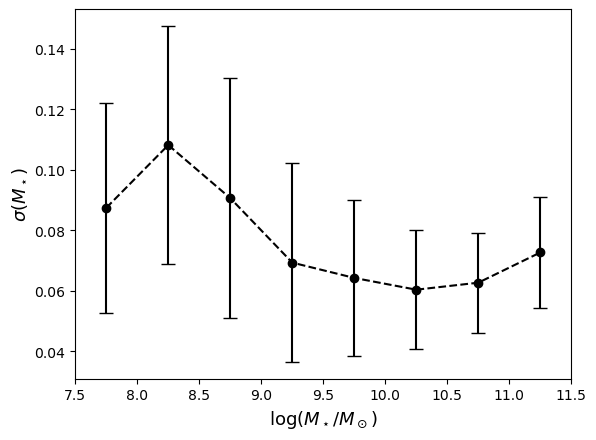

In [9]:
# x坐标
x = [7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25]

# y坐标和误差
y = mean_std_lgm_values
y_err = std_std_lgm_values

# 绘制误差棒图
# plt.errorbar(x, y, yerr=y_err, fmt='o--', capsize=5, color='k', label='1$\sigma$')
plt.errorbar(x, y, yerr=y_err, fmt='o--', capsize=5, color='k')

# 添加标签和标题
plt.xlabel(r'$\log(M_\star/M_\odot)$', fontsize=13)
plt.ylabel(r'$\sigma(M_\star)$', fontsize=13)


x_ticks = [7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5]
plt.xticks(x_ticks)

# 显示图例
# plt.legend(fontsize=13)

# plt.savefig('uncertainty_lgm.pdf', bbox_inches='tight')

# 显示图像
plt.show()

## SSFR

In [10]:
# 定义区间和间隔
start = -12.5
end = -8
interval = 0.5

# 创建区间范围
bins = np.arange(start, end + interval, interval)

# 根据10轮预测值的均值 划分样本区间
df['ssfr_bin'] = pd.cut(df['ssfr_mean'], bins=bins)

In [11]:
# 统计各区间的数量
counts = df['ssfr_bin'].value_counts().sort_index()

# 输出结果
print(counts)

(-12.5, -12.0]    9032
(-12.0, -11.5]    5916
(-11.5, -11.0]    2444
(-11.0, -10.5]    2206
(-10.5, -10.0]    3213
(-10.0, -9.5]     4795
(-9.5, -9.0]      2082
(-9.0, -8.5]       302
(-8.5, -8.0]        10
Name: ssfr_bin, dtype: int64


In [12]:
# 选择列
columns = ['ssfr_1', 'ssfr_2', 'ssfr_3', 'ssfr_4', 'ssfr_5', 'ssfr_6', 'ssfr_7', 'ssfr_8', 'ssfr_9', 'ssfr_10']

# 定义一个函数来计算每行的标准差
def row_std(row):
    return row[columns].std()

# 计算每一行样本的标准差
df['row_std'] = df.apply(row_std, axis=1)

# 输出结果
print(df['row_std'])

0        0.108197
1        0.275258
2        0.233073
3        0.255432
4        0.038691
           ...   
29995    0.104053
29996    0.273403
29997    0.083351
29998    0.117482
29999    0.173139
Name: row_std, Length: 30000, dtype: float64


In [13]:
# 按照 'ssfr_bin' 划分的区间，计算标准差的均值
mean_std_ssfr = df.groupby('ssfr_bin')['row_std'].mean()

# 存储mean_std_lgm的值
mean_std_ssfr_values = []

for name, mean_dev in mean_std_ssfr.iteritems():
    mean_std_ssfr_values.append(mean_dev)

# 包含了每个区间样本的 标准差的均值
mean_std_ssfr_values

E:\Temp\ipykernel_3484\3280636561.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, mean_dev in mean_std_ssfr.iteritems():


[0.04035331638634728,
 0.07617261618530956,
 0.13147285907670148,
 0.13243195851248737,
 0.10690831983467662,
 0.09877639026420142,
 0.10811338354407479,
 0.12748480572259102,
 0.16089774383677272]

In [14]:
# 按照 'ssfr_bin' 划分的区间，计算标准差的标准差
std_std_ssfr = df.groupby('ssfr_bin')['row_std'].std()

# 存储std_std_ssfr的值
std_std_ssfr_values = []

for name, std_dev in std_std_ssfr.iteritems():
    std_std_ssfr_values.append(std_dev)

# 包含了每个区间样本的 标准差的标准差
std_std_ssfr_values

E:\Temp\ipykernel_3484\2225219899.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, std_dev in std_std_ssfr.iteritems():


[0.017986570505539385,
 0.04509233144571849,
 0.06414239566471917,
 0.0688685504172138,
 0.056159447846829365,
 0.03807289396566239,
 0.033488459692007214,
 0.036720002437026396,
 0.03042607187023362]

In [15]:
# 计算所有样本的 标准差的标准差
mean_tmp=np.mean(std_std_ssfr_values)
mean_tmp

0.0434396359827722

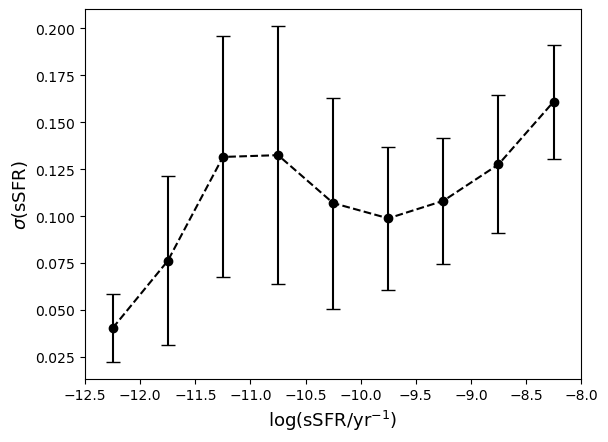

In [16]:
# x坐标
x = [-12.25, -11.75, -11.25, -10.75, -10.25, -9.75, -9.25, -8.75, -8.25]

# y坐标和误差
y = mean_std_ssfr_values
y_err = std_std_ssfr_values

# 绘制误差棒图
plt.errorbar(x, y, yerr=y_err, fmt='o--', capsize=5, color='k')#, label='1$\sigma$')

# 添加标签和标题
plt.xlabel(r'log(sSFR/$\mathrm{yr}^{-1})$', fontsize=13)
plt.ylabel(r'$\sigma$(sSFR)', fontsize=13)


x_ticks = [-12.5, -12, -11.5, -11, -10.5, -10, -9.5, -9, -8.5, -8]
plt.xticks(x_ticks)
# 显示图例
# plt.legend(fontsize=13)

# plt.savefig('uncertainty_ssfr.pdf', bbox_inches='tight')

# 显示图像
plt.show()